In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import datetime
from sklearn.metrics import mean_absolute_error

from scipy.stats import ttest_1samp

from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'
register_matplotlib_converters()
sns.set(style='whitegrid',palette='muted',font_scale=1.5)
rcParams['figure.figsize']=20,10

np.random.RandomState(42)
np.random.seed(0)

In [2]:
databyWeek=pd.read_excel("Data_Shortcut.xlsx",parse_dates=['Tarih'],index_col='Tarih')
data=databyWeek.Tır_sayısı

In [3]:
train=data.iloc[:260]
train

Tarih
2013-01-06    27
2013-01-13    24
2013-01-20    20
2013-01-27    18
2013-02-03    15
              ..
2017-11-26    18
2017-12-03     8
2017-12-10    20
2017-12-17    15
2017-12-24     4
Name: Tır_sayısı, Length: 260, dtype: int64

In [4]:
test=data.iloc[260:]
test

Tarih
2017-12-31    17
2018-01-07    13
2018-01-14    22
2018-01-21    17
2018-01-28    14
2018-02-04    22
2018-02-11    18
2018-02-18    13
2018-02-25    15
2018-03-04    18
2018-03-11    10
2018-03-18    16
2018-03-25    12
2018-04-01    15
2018-04-08    13
2018-04-15    14
2018-04-22    15
2018-04-29    10
2018-05-06    12
2018-05-13    13
2018-05-20    12
2018-05-27    15
2018-06-03    16
2018-06-10    13
2018-06-17    12
2018-06-24    12
2018-07-01    17
2018-07-08    17
2018-07-15    12
2018-07-22    18
2018-07-29    20
2018-08-05     9
2018-08-12     7
2018-08-19    15
2018-08-26     1
2018-09-02    10
2018-09-09    19
2018-09-16    12
2018-09-23    11
2018-09-30    13
2018-10-07    12
2018-10-14    11
2018-10-21    10
2018-10-28    12
2018-11-04    11
Name: Tır_sayısı, dtype: int64

# ARİMA, SARİMA Model

In [5]:
from pmdarima.arima import auto_arima

C:\Users\mert_\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
stepwise_model=auto_arima(train,start_p=1, start_q=1, max_p=5, max_q=5, m=12, d=1, D=1,start_P=0,trace=True,
                          stepwise=True, suppress_warnings=True, seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.90 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1676.458, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1580.991, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1638.977, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1556.591, Time=0.37 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.03 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.89 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1590.957, Time=0.24 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1533.193, Time=0.51 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1561.051, Time=0.16 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.05 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.28 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=1525.621, Time=0.73 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=1555.0

In [7]:
print(stepwise_model.aic())

1486.8632564660275


In [8]:
print(stepwise_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  260
Model:             SARIMAX(5, 1, 4)x(2, 1, 0, 12)   Log Likelihood                -731.432
Date:                            Fri, 08 Jan 2021   AIC                           1486.863
Time:                                    01:44:52   BIC                           1528.976
Sample:                                         0   HQIC                          1503.818
                                            - 260                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3595      0.150      2.403      0.016       0.066       0.653
ar.L2         -0.5090      0.101   

In [9]:
pred=stepwise_model.predict(45)
pred

array([ 9.70408945, 14.06903947, 14.15805423, 11.79867657, 12.57202069,
       13.49551573, 11.69291951, 15.26033138, 10.18469784, 16.72538544,
       11.94638643, 10.80097099, 12.62895114, 15.16127733, 14.19568276,
        8.3604387 , 10.15484685, 13.17742193, 11.4176022 , 13.30800787,
       10.83854688, 14.91810233, 11.64175119, 10.69229974,  9.63247099,
       12.7048016 , 12.89595062, 10.48222106, 11.72861977, 14.97249516,
       11.91868839, 15.46304765, 10.04306361, 18.15444895, 12.68804939,
        8.18482238, 11.19123462, 13.63498549, 14.07180538, 11.068656  ,
       11.2988945 , 13.74615259, 12.34732328, 14.56293528, 10.20602184])

In [10]:
MAE=mean_absolute_error(test,pred)
RMSE=np.sqrt(mean_absolute_error(test,pred))
R2_Score=r2_score(test,pred)

In [11]:
error = {'MAE': [MAE], 'RMSE': [RMSE],'R²':[R2_Score]} #to get r² push alt+0178
evaluate=pd.DataFrame(error,index=['Deger'])
evaluate

,MAE,RMSE,R²
Deger,3.387283,1.840457,-0.291827


In [12]:
orn=np.random.choice(data,45)
orn

array([ 9, 15, 15, 11, 11, 13, 17, 13, 10, 13,  7, 13, 16, 14,  0, 15, 13,
        8, 14, 14, 17, 13, 22,  9,  8, 14, 13,  8,  8, 12,  7,  7, 12, 22,
       17, 12,  8,  4,  8, 11, 13, 15,  4, 21, 20], dtype=int64)

In [13]:
orn_ort=orn.mean()
orn_ort
orn_std=np.std(orn)
orn_std
orn_var=np.var(orn) #import statistics to statistics.variance(orn)
orn_var
model_ort=pred.mean()
model_ort
model_std=np.std(pred)
model_std
model_var=np.var(pred)
model_var

4.479808291419899

In [14]:
asdfg= { 'Gerçek Değerler': [orn_ort,orn_std,orn_var],'Tahmin Değerleri': [model_ort,model_std,model_var]}

In [15]:
asdfg=pd.DataFrame(asdfg,index=['Ortalama','Standart Sapma','Varyans'])

In [16]:
asdfg

,Gerçek Değerler,Tahmin Değerleri
Ortalama,12.133333,12.442216
Standart Sapma,4.626494,2.116556
Varyans,21.404444,4.479808


In [17]:
ttest,pvalue=ttest_1samp(pred,popmean=13.66)

In [18]:
print(pvalue)

0.00041944195164633064


In [19]:
pvalue<0.05

True

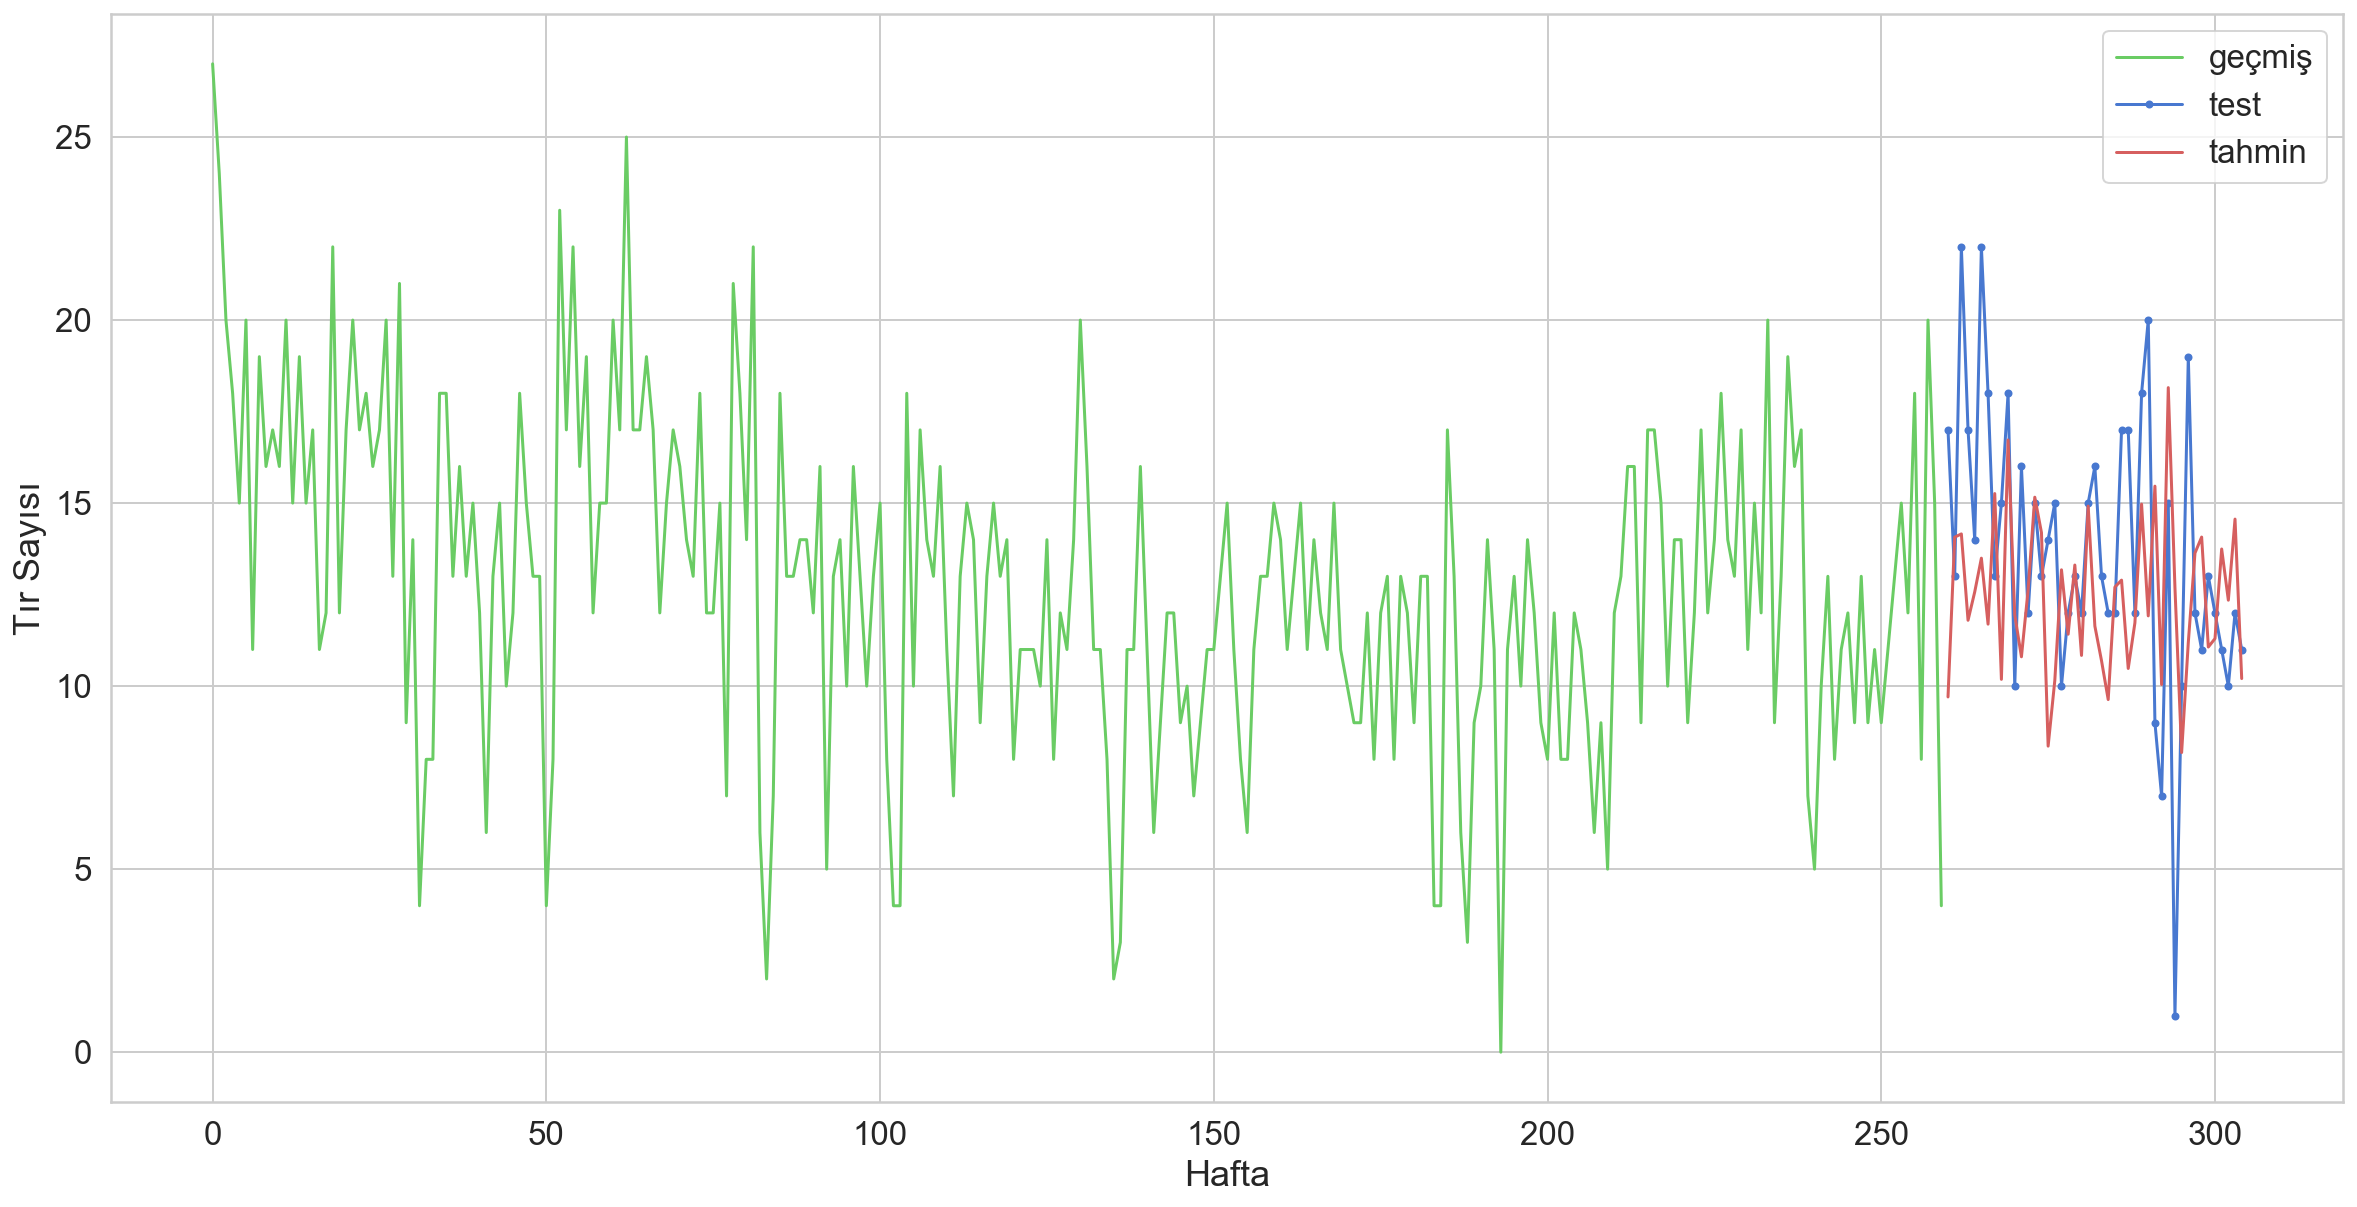

In [20]:
plt.plot(np.arange(0, len(train)), train, 'g', label="geçmiş")
plt.plot(np.arange(len(train), len(train) + len(test)), test, marker='.', label="test")
plt.plot(np.arange(len(train), len(train) + len(test)), pred, 'r', label="tahmin")
plt.ylabel('Tır Sayısı')
plt.xlabel('Hafta')
plt.legend()
#plt.savefig('ss11')
plt.show()